In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [167]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import datetime as dt
import random as ran
from sklearn.metrics.pairwise import euclidean_distances as euc

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from src.dbc import TimeDivisionKMeans
from src.dbc.utils import data_preprocessing, \
        dimension_reduction, \
        calc_contribution, \
        calc_contribution_rank, \
        remove_anomaly

import src.crs as crs

# 1. Load Excel

In [413]:
# 1. load_excel

# data/apt_all.xlsx
# data/apt_1.xlsx
# data/apt_3.xlsx
# data/apt_4.xlsx
# data/apt_std_nugin_1_3.xlsx

data_path = "data/apt_3.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
df = data_preprocessing(xlsx)

# 3. dimension_reduction
df = dimension_reduction(df)

# 4. day clustering
copy_df = df.copy()

In [414]:
df = copy_df[:24 * 31]
size = 3
tdKMeans = TimeDivisionKMeans(df, size=size)

df.head()

,아파트3-102-603,아파트3-102-901,아파트3-102-1205,아파트3-102-302,아파트3-102-1001,아파트3-102-701,아파트3-102-903,아파트3-102-1803,아파트3-101-1405,아파트3-103-1609,...,아파트3-101-1307,아파트3-101-1207,아파트3-103-1622,아파트3-103-1309,아파트3-103-311,아파트3-103-322,아파트3-101-106,아파트3-103-1911,아파트3-103-612,아파트3-103-1418
2018-05-01 00:00:00,0.365,0.307,0.144,0.237,0.310,0.424,0.382,0.165,0.704,0.412,...,0.157,0.191,0.274,0.245,0.354,0.325,0.235,0.495,0.332,0.096
2018-05-01 01:00:00,0.236,0.316,0.135,0.399,0.292,0.313,0.340,0.146,0.351,0.289,...,0.152,0.179,0.267,0.229,0.226,0.202,0.246,0.491,0.348,0.076
2018-05-01 02:00:00,0.180,0.311,0.169,0.438,0.312,0.319,0.322,0.155,0.365,0.255,...,0.162,0.195,0.240,0.236,0.240,0.150,0.244,0.496,0.283,0.066
2018-05-01 03:00:00,0.194,0.317,0.267,0.530,0.279,0.233,0.226,0.242,0.321,0.200,...,0.173,0.187,0.228,0.204,0.227,0.125,0.229,0.491,0.371,0.058
2018-05-01 04:00:00,0.267,0.323,0.179,0.745,0.245,0.201,0.175,0.179,0.337,0.222,...,0.146,0.172,0.234,0.320,0.210,0.144,0.219,0.494,0.329,0.053


# 2. Run Clustering (3시간 단위로 클러스터링)

In [415]:
tdKMeans.init_setting()
hc, ci = tdKMeans.run()

hc.head()

10 / 248 ==> 83.95590751344754
20 / 248 ==> 80.23621755120371
30 / 248 ==> 80.39269998315551
40 / 248 ==> 81.75934866036675
50 / 248 ==> 84.30373508038723
60 / 248 ==> 85.04063557562843
70 / 248 ==> 82.71259527553131
80 / 248 ==> 81.71276561650491
90 / 248 ==> 87.17234352040077
100 / 248 ==> 84.42804179232697
110 / 248 ==> 84.89102311555193
120 / 248 ==> 85.93535162681547
130 / 248 ==> 82.2660887094417
140 / 248 ==> 81.38260005467008
150 / 248 ==> 80.09794953883312
160 / 248 ==> 85.81576257809682
170 / 248 ==> 82.00465047832687
180 / 248 ==> 83.42133091994279
190 / 248 ==> 80.23721749375513
200 / 248 ==> 86.12255878732837
210 / 248 ==> 84.03280686568851
220 / 248 ==> 81.05879989555886
230 / 248 ==> 80.79291539318953
240 / 248 ==> 80.85580792024123
248 / 248 ==> 85.25357425065349


,아파트3-102-603,아파트3-102-901,아파트3-102-1205,아파트3-102-302,아파트3-102-1001,아파트3-102-701,아파트3-102-903,아파트3-102-1803,아파트3-101-1405,아파트3-103-1609,...,아파트3-101-1307,아파트3-101-1207,아파트3-103-1622,아파트3-103-1309,아파트3-103-311,아파트3-103-322,아파트3-101-106,아파트3-103-1911,아파트3-103-612,아파트3-103-1418
0,1.0,5.0,3.0,5.0,5.0,2.0,2.0,3.0,6.0,2.0,...,3.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,4.0
1,3.0,0.0,3.0,1.0,3.0,3.0,2.0,3.0,0.0,3.0,...,6.0,2.0,3.0,0.0,3.0,2.0,3.0,1.0,0.0,4.0
2,1.0,3.0,5.0,4.0,0.0,5.0,0.0,1.0,3.0,3.0,...,5.0,1.0,5.0,6.0,3.0,5.0,6.0,3.0,5.0,1.0
3,5.0,0.0,0.0,3.0,3.0,0.0,0.0,1.0,6.0,6.0,...,0.0,5.0,5.0,3.0,5.0,0.0,5.0,6.0,4.0,1.0
4,5.0,0.0,3.0,6.0,6.0,3.0,3.0,1.0,5.0,5.0,...,0.0,0.0,3.0,6.0,5.0,5.0,0.0,0.0,5.0,0.0


# 3. Contribution Map

In [416]:
contribution_df = calc_contribution_rank(hc, ci)
contribution_df.index = df.index[::size] 

contribution_df.head()

rank!


,아파트3-102-603,아파트3-102-901,아파트3-102-1205,아파트3-102-302,아파트3-102-1001,아파트3-102-701,아파트3-102-903,아파트3-102-1803,아파트3-101-1405,아파트3-103-1609,...,아파트3-101-1307,아파트3-101-1207,아파트3-103-1622,아파트3-103-1309,아파트3-103-311,아파트3-103-322,아파트3-101-106,아파트3-103-1911,아파트3-103-612,아파트3-103-1418
2018-05-01 00:00:00,3.0,4.0,2.0,4.0,4.0,5.0,5.0,2.0,7.0,5.0,...,2.0,2.0,3.0,3.0,3.0,3.0,3.0,6.0,5.0,1.0
2018-05-01 03:00:00,3.0,5.0,3.0,7.0,3.0,3.0,2.0,3.0,5.0,3.0,...,4.0,2.0,3.0,5.0,3.0,2.0,3.0,7.0,5.0,1.0
2018-05-01 06:00:00,1.0,6.0,2.0,7.0,4.0,2.0,4.0,1.0,6.0,6.0,...,2.0,1.0,2.0,5.0,6.0,2.0,5.0,6.0,2.0,1.0
2018-05-01 09:00:00,3.0,3.0,3.0,6.0,6.0,3.0,3.0,1.0,4.0,4.0,...,3.0,3.0,3.0,6.0,3.0,3.0,3.0,4.0,6.0,1.0
2018-05-01 12:00:00,4.0,2.0,4.0,6.0,6.0,4.0,4.0,1.0,4.0,4.0,...,2.0,2.0,4.0,6.0,4.0,4.0,2.0,2.0,4.0,2.0


# 4. Remove Anomaly Contribution Household

In [417]:
cont_mean_df = remove_anomaly(df, contribution_df)

cont_mean_df.head()

,contribution
아파트3-102-603,4.0
아파트3-102-901,4.0
아파트3-102-1205,3.0
아파트3-102-302,4.0
아파트3-102-1001,5.0


# 5. 각 기여도 그룹별로 많이 속해있었던 클러스터링을 해당 기여도 그룹의 대표 클러스터링으로 산출

In [418]:
# Cluster by Contribution GroupBy
cc = pd.DataFrame()
cont_group = set(cont_mean_df.values.flatten())

for group in cont_group:
    group_cols = cont_mean_df[cont_mean_df['contribution'] == group].index
    _hc = hc[group_cols].T.copy()
    _clusters = np.array([])
    
    for idx in range(0, len(hc)):
        _group = _hc[idx].groupby(_hc[idx]).count()
        max_cluster = _group.argmax()

        _clusters = np.append(_clusters,
                              _group.keys()[max_cluster])
    
    cc["기여도 그룹 {}".format(int(group))] = _clusters
    
cc.head()

,기여도 그룹 1,기여도 그룹 2,기여도 그룹 3,기여도 그룹 4,기여도 그룹 5,기여도 그룹 6
0,4.0,3.0,3.0,1.0,1.0,0.0
1,4.0,2.0,2.0,0.0,0.0,1.0
2,1.0,1.0,5.0,6.0,3.0,3.0
3,1.0,1.0,6.0,0.0,3.0,2.0
4,0.0,0.0,5.0,5.0,5.0,6.0


# 6. Pattern Matching

In [419]:
cc_cols = cc.columns
_cc_pattern = np.array([])

for cc_col in cc_cols:
    _cc = cc[cc_col]
    for division_round, _cc in enumerate(_cc):
        _round_pattern = ci[division_round][0][int(_cc)]
        
        _cc_pattern = np.append(_cc_pattern,_round_pattern)
        
cc_pattern = pd.DataFrame(_cc_pattern.reshape(-1,len(cc) * 3),
                         index=cc_cols,
                         columns=df.index).T
cc_pattern.head()

,기여도 그룹 1,기여도 그룹 2,기여도 그룹 3,기여도 그룹 4,기여도 그룹 5,기여도 그룹 6
2018-05-01 00:00:00,0.072,0.170,0.170,0.277,0.277,0.485
2018-05-01 01:00:00,0.066,0.164,0.164,0.232,0.232,0.466
2018-05-01 02:00:00,0.066,0.159,0.159,0.231,0.231,0.433
2018-05-01 03:00:00,0.106,0.167,0.167,0.293,0.293,0.493
2018-05-01 04:00:00,0.104,0.162,0.162,0.333,0.333,0.565


# 7. Group - Cluster Pattern Visualization

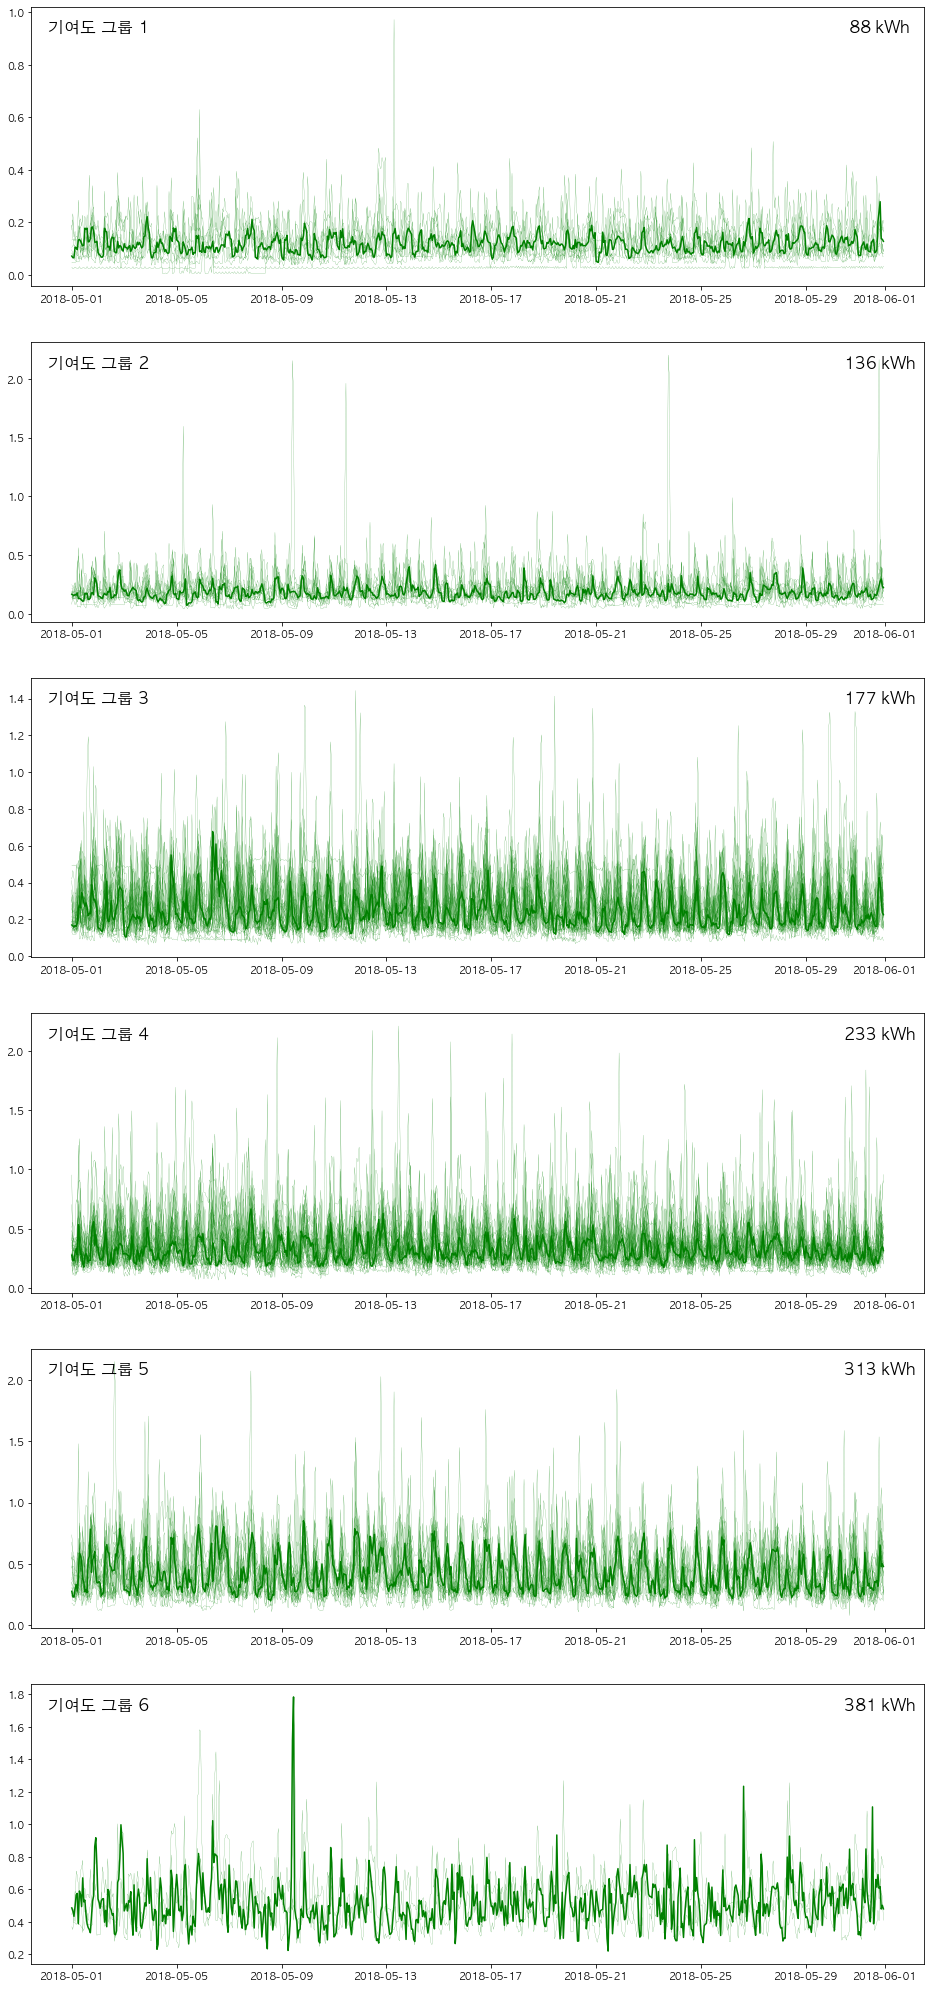

In [420]:
fig, ax = plt.subplots(len(cc_cols),1, figsize=(16, 6 * len(cc_cols)))

for group_idx,group in enumerate(cont_group):
    cols = df.columns
    _group_cols = cols[(cont_mean_df['contribution'] == group).values]

    ax[group_idx].plot(df[_group_cols], linewidth=0.15, color='g')
    ax[group_idx].plot(cc_pattern[cc_cols[group_idx]], linewidth=1.5, color='g')
    ax[group_idx].text(0.075, 0.925, cc_cols[group_idx], 
                       ha='center', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    ax[group_idx].text(0.95, 0.925, "{} kWh".format(round(cc_pattern[cc_cols[group_idx]].sum())), 
                       ha='center', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)

plt.show()

# CRS

In [421]:
p,m = crs.utils.data_preprocessing(xlsx)

m.head()

/Users/formegusto/Desktop/idoformegusto/development/research/distribution-by-contribution/src/crs/utils/data_preprocessing.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  datas_df[household_name] = household_df[col][3:].to_list()
/Users/formegusto/Desktop/idoformegusto/development/research/distribution-by-contribution/src/crs/utils/data_preprocessing.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  month_usage_df[name] = [


,month,아파트3-101-1001,아파트3-101-102,아파트3-101-106,아파트3-101-1207,아파트3-101-1302,아파트3-101-1307,아파트3-101-1405,아파트3-101-1507,아파트3-101-1602,...,아파트3-103-803,아파트3-103-820,아파트3-103-822,아파트3-103-825,아파트3-103-827,아파트3-103-911,아파트3-103-915,아파트3-103-919,아파트3-103-922,아파트3-103-923
0,1,310,307,241,168,360,225,262,206,298,...,179,100,105,195,152,329,86,134,199,478
1,2,266,260,226,148,317,180,233,202,260,...,162,85,103,200,135,259,77,116,172,448
2,3,281,281,207,175,348,141,258,207,295,...,183,86,100,215,151,259,88,121,196,464
3,4,299,271,179,171,328,134,264,216,268,...,172,78,101,162,136,258,82,130,177,425
4,5,319,276,194,163,269,167,259,232,247,...,181,79,99,165,92,252,96,142,183,354


In [422]:
# 3. bill - calc
min_per = 10
max_per = 80
bc_result = crs.utils.bill_calc(m, p, min_per, max_per)

In [423]:
# 일반분석
na_result = crs.utils.normal_analysis(bc_result)

In [424]:
na_result['pos_change_per']['positive_count']

array([37., 43., 28., 28., 30., 46., 32., 35., 30., 29., 41., 38.])

# 기여도 그룹별로 종합계약에 유리한지 단일계약에 유리한지 확인하기

In [442]:
# 28 percentage 지점에서 변화를 보임 (추천 계약 시스템 상에서 단일계약의 최상위 percentage)
month = df.index[0].month

positive_count_per = int(na_result['pos_change_per']['positive_count'][month - 1] - 1)

comp_public_bill = int(bc_result['public_bill']['comp'].loc[month][str(positive_count_per)])
single_public_bill = int(bc_result['public_bill']['single'].loc[month][str(positive_count_per)])

comp_pos_cnt = int(na_result['positive_count']['comp'].loc[month][str(positive_count_per)])
single_pos_cnt = int(na_result['positive_count']['single'].loc[month][str(positive_count_per)])

print("공동설비사용량 {}% 지점의 정보 {} : {}".format(positive_count_per, comp_pos_cnt, single_pos_cnt))
print("• 종합계약 공동설비사용요금 : {}원".format(format(comp_public_bill, ",")))
print("   • 1인당 지불해야 하는 요금 : {}원".format(format(round(comp_public_bill / len(df.columns)), ",")))
print("• 단일계약 공동설비사용요금 : {}원".format(format(single_public_bill, ",")))
print("   • 1인당 지불해야 하는 요금 : {}원".format(format(round(single_public_bill / len(df.columns)), ",")))

공동설비사용량 29% 지점의 정보 55 : 55
• 종합계약 공동설비사용요금 : 1,053,050원
   • 1인당 지불해야 하는 요금 : 9,573원
• 단일계약 공동설비사용요금 : 1,628,210원
   • 1인당 지불해야 하는 요금 : 14,802원


# 종합계약 유리 가구, 단일계약 유리 가구 분리

In [426]:
comp_bill = bc_result['households_bill']['comp'][month - 1]
single_bill = bc_result['households_bill']['single'][month - 1]

bill_cols = comp_bill.columns

pos_comp_cols = bill_cols[comp_bill.loc[positive_count_per] < single_bill.loc[positive_count_per]]
pos_single_cols = bill_cols[comp_bill.loc[positive_count_per] > single_bill.loc[positive_count_per]]

# 속한 기여도 그룹 확인

종합계약 유리 가구 수 기여도 그룹 : {1.0, 2.0, 3.0, 4.0}
단일계약 유리 가구 수 기여도 그룹 : {4.0, 5.0, 6.0}


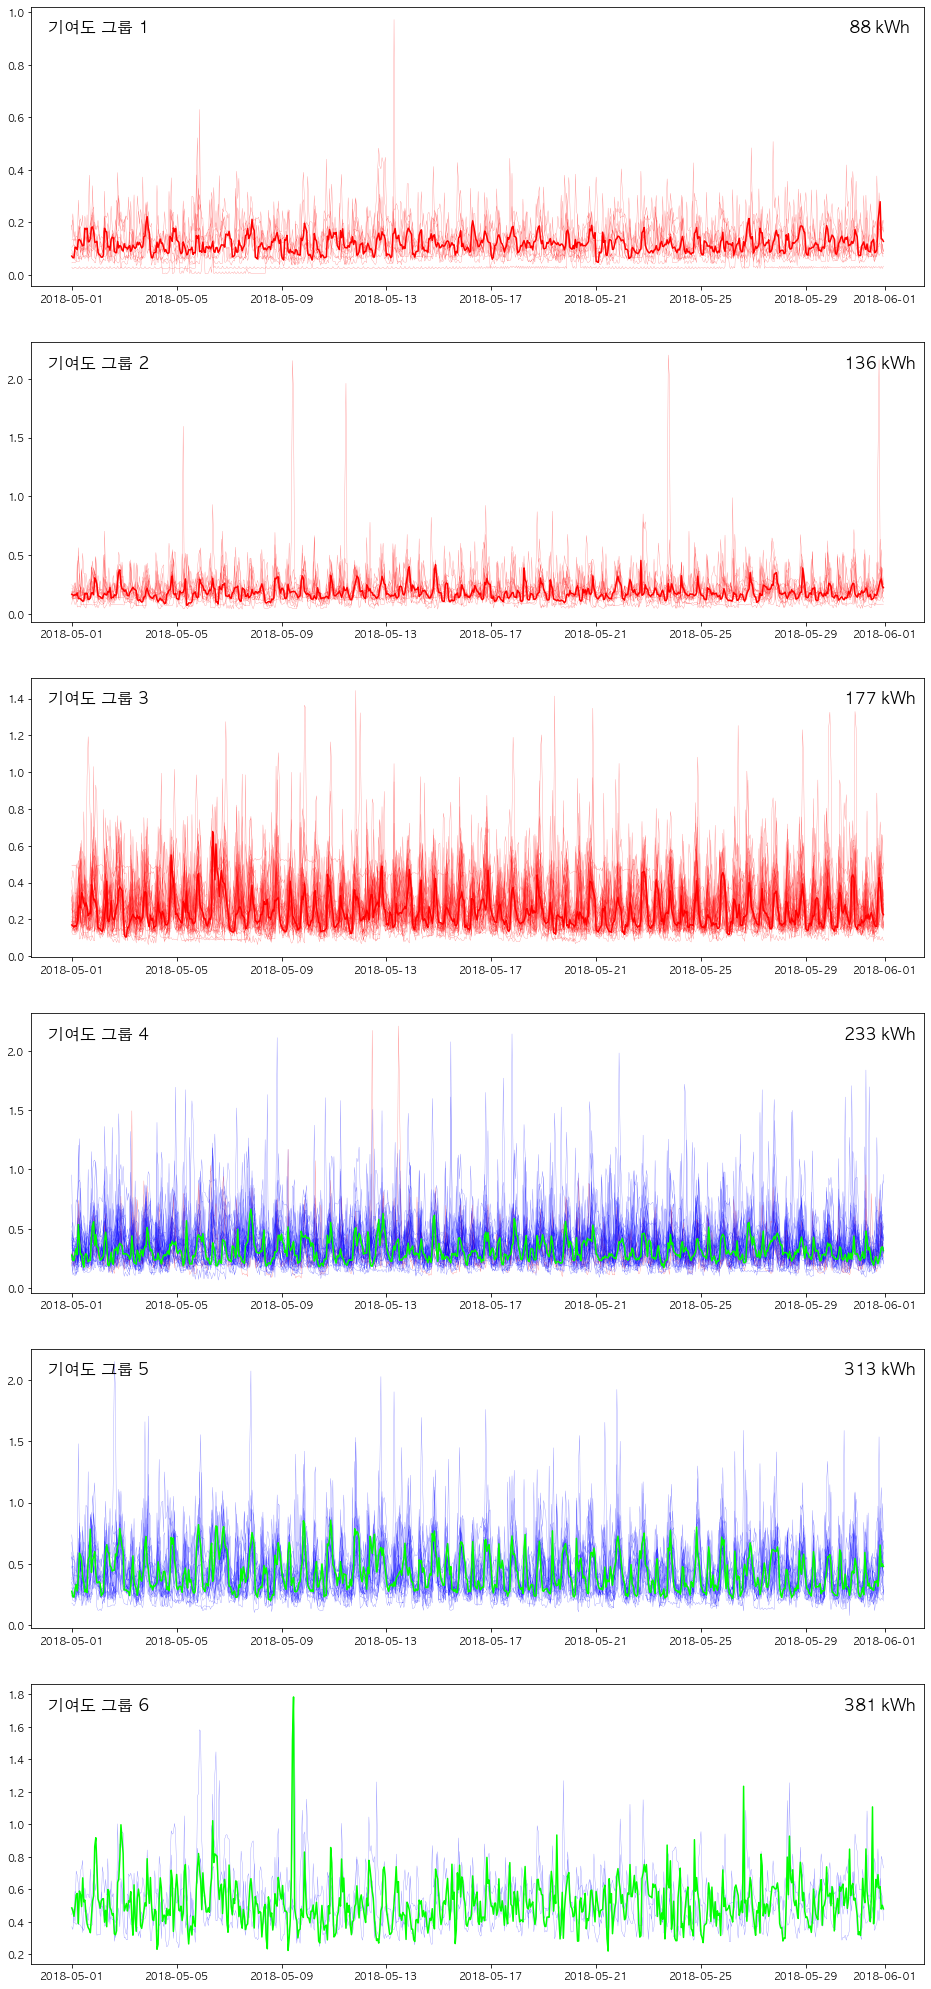

In [427]:
comp_cont_df = cont_mean_df.loc[pos_comp_cols]
single_cont_df = cont_mean_df.loc[pos_single_cols]

print("종합계약 유리 가구 수 기여도 그룹 : {}".format(set(comp_cont_df['contribution'])))
print("단일계약 유리 가구 수 기여도 그룹 : {}".format(set(single_cont_df['contribution'])))

fig, ax = plt.subplots(len(cc_cols),1, figsize=(16, 6 * len(cc_cols)))

for group_idx,group in enumerate(cont_group):
    cols = df.columns
    _group_cols = cols[(cont_mean_df['contribution'] == group).values]
    _comp_win_cnt = 0
    
    for _c in _group_cols:
        ax[group_idx].plot(df[_c], linewidth=0.3, color="r" if _c in pos_comp_cols else "b", alpha=0.5,
                          label="종합계약 유리 가구" if _c in pos_comp_cols else "단일계약 유리 가구")
        if _c in pos_comp_cols:
            _comp_win_cnt += 1
        
    ax[group_idx].plot(
        cc_pattern[cc_cols[group_idx]], linewidth=1.5, color='r' if _comp_win_cnt == len(_group_cols) else 'lime')
    ax[group_idx].text(0.075, 0.925, cc_cols[group_idx], 
                       ha='center', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    ax[group_idx].text(0.95, 0.925, "{} kWh".format(round(cc_pattern[cc_cols[group_idx]].sum())), 
                       ha='center', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)

plt.show()

# 그룹별로 손해 이익 계산
- 가격 분배 1 : 보상제

In [428]:
loss_bill = pd.DataFrame(comp_bill.loc[positive_count_per] - single_bill.loc[positive_count_per])

loss_bill.columns = ["오차"]
loss_bill.head()

,오차
아파트3-101-1001,4058.0
아파트3-101-102,2078.0
아파트3-101-106,-3422.0
아파트3-101-1207,-3952.0
아파트3-101-1302,1748.0


In [508]:
cont_loss_df = pd.DataFrame(index=['그룹 멤버','클러스터링 그룹 사용량','손해', '이익', '공동설비총액'])
personal_public = round(single_public_bill / len(df.columns))
      
for group_idx,group in enumerate(cont_group):
    cc_col = cc_cols[group_idx]
    _group_cols = cols[(cont_mean_df['contribution'] == group).values]
    
    _loss_bill = loss_bill.loc[_group_cols]
    
    loss = _loss_bill[_loss_bill['오차'] < 0].sum()
    profit = _loss_bill[_loss_bill['오차'] > 0].sum()
    
    cont_loss_df[cc_col] = [int(len(_group_cols)),
                            cc_pattern[cc_col].sum().round(),
                            loss['오차'],profit['오차'],
                            personal_public * len(_group_cols)]
    
cont_loss_df

,기여도 그룹 1,기여도 그룹 2,기여도 그룹 3,기여도 그룹 4,기여도 그룹 5,기여도 그룹 6
그룹 멤버,10.0,13.0,30.0,34.0,20.0,3.0
클러스터링 그룹 사용량,88.0,136.0,177.0,233.0,313.0,381.0
손해,-51890.0,-54736.0,-68560.0,-4.0,0.0,0.0
이익,0.0,0.0,0.0,41336.0,74730.0,22894.0
공동설비총액,148020.0,192426.0,444060.0,503268.0,296040.0,44406.0


### 공동설비고유누진단계, 공동설비시작누진단계

In [462]:
households_kWh = df.values.sum().round()
APT = round((households_kWh * 100) / (100 - positive_count_per))
public_kWh = APT - households_kWh

print("세대부 사용량 : {}kwh {}kWh".format(format(int(households_kWh), ","),
                                           format(round(households_kWh / len(df.columns)), ",")))
print("공용부 사용량 : {}kwh {}kWh\n".format(format(int(public_kWh), ","),
                                           format(round(public_kWh / len(df.columns)), ",")))

nugin_step = [0, 201, 401]
og_public_step = 0
start_public_step = 0

# 고유 누진 단계 계산
_temp = round(public_kWh / len(df.columns))
for step in nugin_step:
    og_public_step +=1
    if _temp <= 200:
        _temp -= 200
        break
        
print("공동설비고유누진단계: {}단계".format(og_public_step))

_temp = round(households_kWh / len(df.columns))
for step in nugin_step:
    start_public_step +=1
    if _temp <= 200:
        break
    else:
        _temp -= 200
print("공동설비시작누진단계: {}단계".format(start_public_step))

세대부 사용량 : 24,858kwh 226kWh
공용부 사용량 : 10,153kwh 92kWh

공동설비고유누진단계: 1단계
공동설비시작누진단계: 2단계


- 가격 분배 2: 클러스터링 사용량만큼 모두 이렇게 사용했다면 나는?

In [526]:
for cc_col in cc_cols:
    cluster_usage_df = pd.DataFrame(df.sum()).T

    cluster_usage_df.loc[0] = cc_pattern[cc_col].sum().round()
    cluster_usage_df['month'] = 1

    _bc_result = crs.utils.bill_calc(cluster_usage_df, p, min_per, max_per)
    _na_result = crs.utils.normal_analysis(_bc_result)
    
    public_bill = _bc_result['public_bill']['single'].loc[1][str(positive_count_per - 1)]
    personal_public_bill = public_bill / len(df.columns)

    print("그룹명 : {}, 공동설비사용요금: {}원 (인당 {}원)".
          format(cc_col,
                format(int(public_bill), ","),
                format(int(personal_public_bill), ",")
                )
         )

그룹명 : 기여도 그룹 1, 공동설비사용요금: 634,190원 (인당 5,765원)
그룹명 : 기여도 그룹 2, 공동설비사용요금: 814,460원 (인당 7,404원)
그룹명 : 기여도 그룹 3, 공동설비사용요금: 1,429,460원 (인당 12,995원)
그룹명 : 기여도 그룹 4, 공동설비사용요금: 1,646,750원 (인당 14,970원)
그룹명 : 기여도 그룹 5, 공동설비사용요금: 3,105,900원 (인당 28,235원)
그룹명 : 기여도 그룹 6, 공동설비사용요금: 4,380,100원 (인당 39,819원)
